In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.rename(columns={'#Passengers':'Passengers'},inplace = True)

<AxesSubplot:>

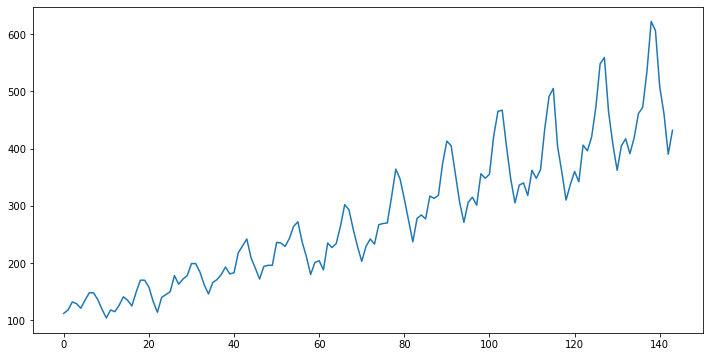

In [4]:
plt.rcParams.update({'figure.figsize':(12,6)})
df['Passengers'].plot()

### Method-1 : Differencing and Seasonal differencing

In [5]:
# Differening Meaning y(t) = y(t) - y(t-1) 
# 118-112 = 3; 129-132=-3
df['Passengers_diff'] = df['Passengers'] - df['Passengers'].shift(1) 

In [6]:
df.head()

,Month,Passengers,Passengers_diff
0,1949-01,112,NaN
1,1949-02,118,6.0
2,1949-03,132,14.0
3,1949-04,129,-3.0
4,1949-05,121,-8.0


<AxesSubplot:>

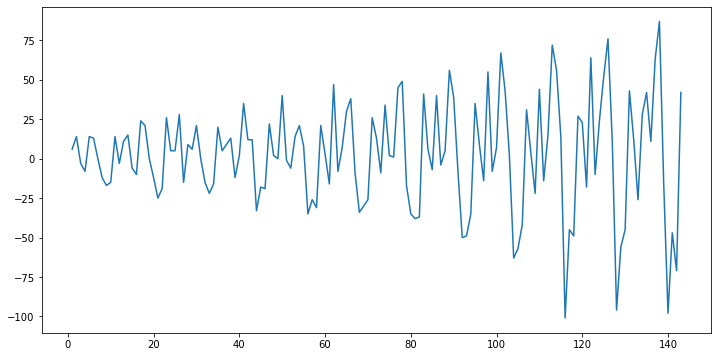

In [7]:
df['Passengers_diff'].dropna().plot()

<AxesSubplot:>

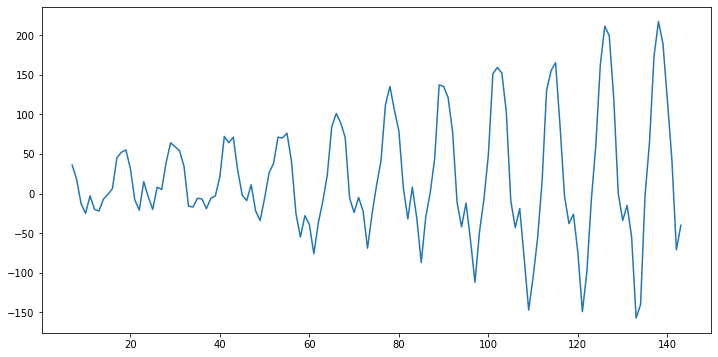

In [8]:
# Seasonal differencing y(t) = y(t) - y(t-n) 
df['Passengers_sdiff'] = df['Passengers'] - df['Passengers'].shift(7) 
df['Passengers_sdiff'].dropna().plot()

In [9]:
df.head(10)

,Month,Passengers,Passengers_diff,Passengers_sdiff
0,1949-01,112,NaN,NaN
1,1949-02,118,6.0,NaN
2,1949-03,132,14.0,NaN
3,1949-04,129,-3.0,NaN
4,1949-05,121,-8.0,NaN
5,1949-06,135,14.0,NaN
6,1949-07,148,13.0,NaN
7,1949-08,148,0.0,36.0
8,1949-09,136,-12.0,18.0
9,1949-10,119,-17.0,-13.0


### Method-2: Transformation

In [13]:
#create transformation column
#import numpy as np


#calculate the log
df['adj_log'] = np.log(df['Passengers'])


#calculate the square root
df['adj_sqrt'] = np.sqrt(df['Passengers'])


#calculate the cube root
df['adj_cbrt'] = np.cbrt(df['Passengers'])

<AxesSubplot:>

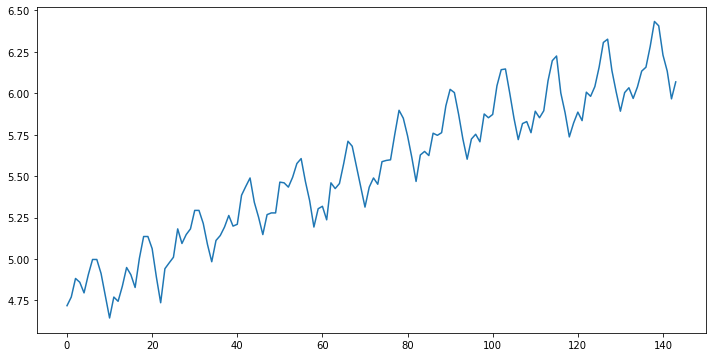

In [14]:
df['adj_log'].dropna().plot()

<AxesSubplot:>

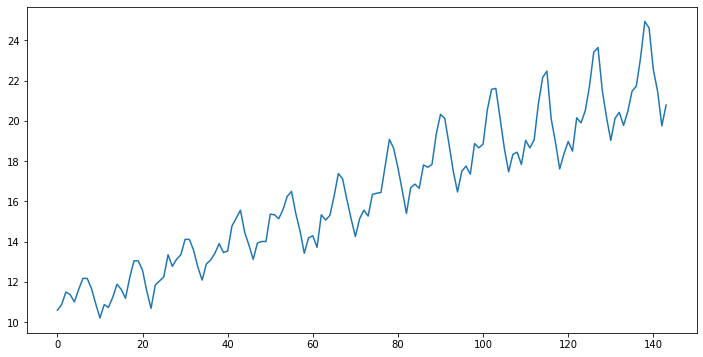

In [16]:
df['adj_sqrt'].dropna().plot()

<AxesSubplot:>

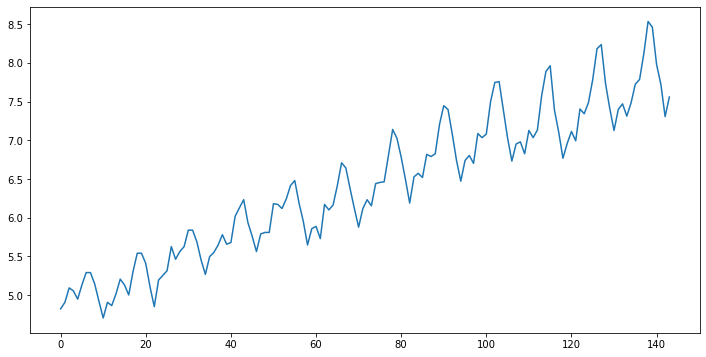

In [17]:
df['adj_cbrt'].dropna().plot()

<AxesSubplot:>

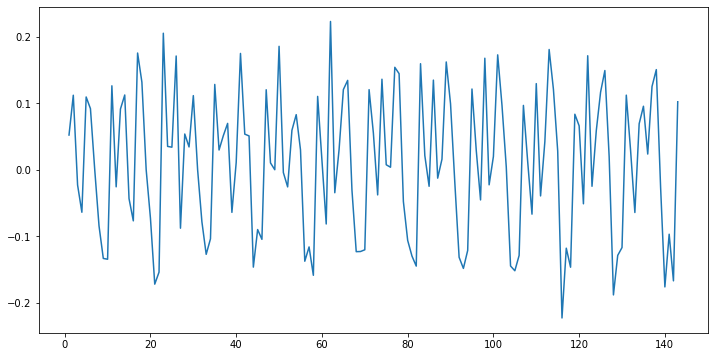

In [18]:
df['Passengers_log_diff'] = df['adj_log'] - df['adj_log'].shift(1) 
df['Passengers_log_diff'].dropna().plot()

<AxesSubplot:>

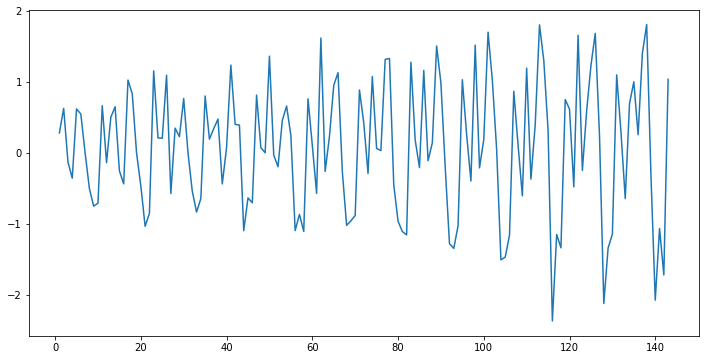

In [19]:
df['Passengers_sqrt_diff'] = df['adj_sqrt'] - df['adj_sqrt'].shift(1) 
df['Passengers_sqrt_diff'].dropna().plot()

<AxesSubplot:>

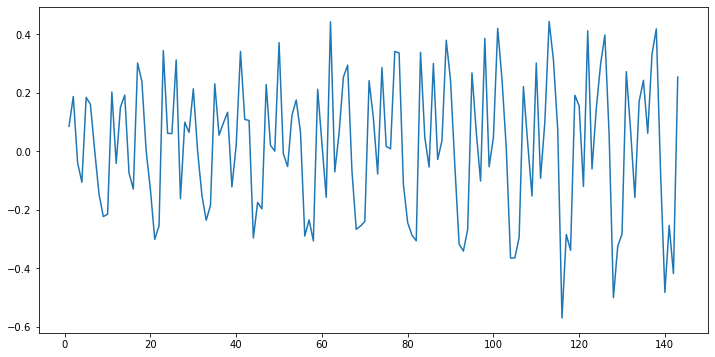

In [20]:
df['Passengers_cbrt_diff'] = df['adj_cbrt'] - df['adj_cbrt'].shift(1) 
df['Passengers_cbrt_diff'].dropna().plot()